# THREE BROTHERS BANK LOAN APPRAISAL SYSTEM

###  INTRODUCTION 

In the midst of stiff competiton amongst banks and financial istituions to make a return on capital for shareholders, granting of loan facilities is one major way they can achieve this objective. But if these loans are not paid on the terms agreed, it goes along way to erode the gains made by these institutions because of the provisions they have to make for their nonperforming loans and also cost associated with the recovery of delinquent loans.

Therefore it has become very necessay for such institutions to do all the due deligence in their loan appraisal system to enusre that the loans they grant their customers will not only be paid back but will be paid back in time. This important, challenging and critical task is usually associated with delays and a high possibility of error on the part of the officers because of the manual nature of the process and also the possibility of an error in judgement by the officer in assessing the deafult risk level of customers.

Loan appraisal is a critical and difficult task, if the banks or financial institutions are too strict, fewer loans get approved, which means there’s less interest income. But if they’re too lax, they end up approving loans that will end up going bad because of this most banks and financial institutions are employing the help of mechanized system to help in this process.

### PROBLEM STATEMENT

There has been a sustained increase in share prices of Three Brothers Bank (TBB) as such it investor confidence has increased and therefore shareholders have increased their capital for the banks growth. To make the needed return on capital for investors, by TBB wants to increase the volume of loans they grant to customers and still ensure the strictness in the system.  

###  OBJECTIVE 

Our objective is to create an automated loan appraisal system for TBB to help in speedily determing which customer should or should not be granted a loan in a very quick and reliable way. 

### OUTLINE 

1. Importation and Cleaning
2. Data Preparation for Model Building
3. Build and Select the best Model
4. Make Predictions with Model 



### 1. IMPORTATION AND CLEANING 

#### IMPORTATION OF LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelBinarizer,StandardScaler,OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
from sklearn.linear_model import LogisticRegression,RidgeClassifier, PassiveAggressiveClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from keras.models import load_model
import joblib
from sklearn.metrics import accuracy_score
import operator
from keras.models import load_model

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### DATA IMPORTATION

THE DATA WAS PROVIDED BY TBB AND IN ACCORDANCE WITH THE DATA PROTECTION ACT 2012 (Act 843), WE HAVE ENSURED THAT NO PART OF THIS DATA WILL BE TRANSFERED TO A THIRD PARTY NOR WE USED FOR  BUSINESS APART FROM WHAT IT WAS ORIGINALLY INTENDED FOR.

In [2]:
train_set = pd.read_csv("train_set.csv", low_memory=False)
test_set = pd.read_csv("test_set.csv")

#### DATA INSIGHT 

In [3]:
#Showing the instances (rows) and how many attributes (columns) the data contains 
print(train_set.shape) 
print(test_set.shape)


(111107, 19)
(9, 19)


In [4]:
train_set.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [5]:
train_set.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Loan Given,15654,Long Term,686.0,10+ years,Rent,43050.0,Debt Consolidation,889.69,14.1,49.0,18,0,14730,29757,0.0,0.0
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Loan Given,15237,Short Term,706.0,10+ years,Home Mortgage,60948.0,Debt Consolidation,700.90,15.9,48.0,11,0,17733,23060,0.0,0.0
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Loan Given,10413,Short Term,719.0,5 years,Home Mortgage,66945.0,Debt Consolidation,1210.59,8.7,NaN,11,0,5205,6348,0.0,0.0
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Loan Given,34447,Short Term,626.0,10+ years,Home Mortgage,78736.0,Debt Consolidation,1476.30,30.4,9.0,12,0,32318,37580,0.0,0.0
111106,f83ae0e1-bd30-46c7-9f72-f4f9fe2f36ca,74187e35-39c2-4010-ae0d-8bcd0544189e,Loan Given,9209,Long Term,708.0,< 1 year,Own Home,123454.0,Debt Consolidation,668.71,20.1,16.0,8,0,6835,9261,0.0,0.0


In [6]:
train_set.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,1.111070e+05,89769.000000,8.976900e+04,111107.000000,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,110879.00000,111096.000000
mean,1.147718e+07,1075.795029,7.248600e+04,971.970120,18.201003,34.902272,11.125105,0.168027,1.548314e+04,0.11766,0.029353
std,3.185508e+07,1474.133505,5.593094e+04,641.640829,7.014495,21.970696,5.010267,0.484212,1.982115e+04,0.35142,0.260575
min,4.910000e+02,585.000000,4.033000e+03,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000
25%,8.162000e+03,705.000000,4.468800e+04,537.755000,13.500000,16.000000,8.000000,0.000000,5.905000e+03,0.00000,0.000000
50%,1.418300e+04,724.000000,6.175200e+04,852.720000,16.900000,32.000000,10.000000,0.000000,1.102700e+04,0.00000,0.000000
75%,2.382200e+04,741.000000,8.688700e+04,1262.630000,21.700000,51.000000,14.000000,0.000000,1.933800e+04,0.00000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,22939.120000,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.00000,15.000000


In [7]:
train_set.describe(include = 'object')

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Maximum Open Credit
count,111107,111107,111107,111107,106414,111107,111107,111107
unique,88910,88910,2,2,11,4,16,46625
top,1d00b091-d51c-4128-82ac-1eac07c75150,68f34936-b154-485f-ad0b-b3f0a4114f9d,Loan Given,Short Term,10+ years,Home Mortgage,Debt Consolidation,0
freq,2,2,85934,80274,34551,53818,87277,752


In [8]:
#SDisplaying a concise summary of dataframe
train_set.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  float64
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

In [9]:
#Defining the Features of the column,we have created a data dictionary so that interpreting each column will be easy
data_dic = pd.read_excel('Dic_data.xlsx',sheet_name='Loan_data')
pd.set_option('max_colwidth',700)
data_dic

,LoanStatNew,Description
0,annual_income -,The self-reported annual income provided by the borrower during registration
1,bankruptcies -,Number of public record bankruptcies
2,credit_score -,A value between 0 and 800 indicating the riskiness of the borrowers credit history.
3,current_credit_balance -,"The amount you owe on your account, minus any pending purchases or payments"
4,current_loan_amount -,"This is the loan amount that was was either completely paid off, or the amount that was defaulted. This data is for the previous loan"
5,home_ownership -,"The home ownership status (Rent, Mortgage, Home Owner)"
6,loan_status -,A categorical variable indicating if the loan was given or not
7,maximum_open_credit -,Maximum credit limit the borrower is allowed to spend on his credit
8,monthly_debt -,The monthly repayment for the customer's previous laon
9,months_since_last_delinquent -,The number of 30+ days past-due incidences of delinquency in the borrower's credit file


#### DATA CLEANING 

In [10]:
# For uniformity and easy handling of our column headings, we change them to lower case and replace the space with underscore. 
train_set.columns = train_set.columns.str.lower()
train_set.columns = train_set.columns.str.replace(' ', '_')

In [11]:
train_set.columns

Index(['loan_id', 'customer_id', 'loan_status', 'current_loan_amount', 'term',
       'credit_score', 'years_in_current_job', 'home_ownership',
       'annual_income', 'purpose', 'monthly_debt', 'years_of_credit_history',
       'months_since_last_delinquent', 'number_of_open_accounts',
       'number_of_credit_problems', 'current_credit_balance',
       'maximum_open_credit', 'bankruptcies', 'tax_liens'],
      dtype='object')

In [12]:
train_set.sort_values('current_loan_amount', axis = 0, ascending = True)


,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
24387,7fd15008-5365-4385-bace-c093b1837555,2e70f347-b5e7-4c3c-aafd-1d0658f1b258,Loan Given,491,Short Term,NaN,< 1 year,HaveMortgage,NaN,Take a Trip,19.67,27.4,8.0,3,0,43,1168,NaN,0.0
51376,20c4e560-e543-486a-a010-12bcdbc1b3ff,bf05d4b0-1506-4c88-aa04-8da7e66107a8,Loan Given,511,Short Term,747.0,< 1 year,Rent,18389.0,other,65.43,12.7,0.0,4,0,0,0,NaN,0.0
104273,50118373-dd2c-402d-918b-a9e49d921eac,66a2647a-daec-494b-8588-2c846bba495f,Loan Given,701,Short Term,718.0,< 1 year,Rent,19040.0,Debt Consolidation,196.74,11.6,NaN,4,0,0,0,0.0,0.0
61783,50118373-dd2c-402d-918b-a9e49d921eac,66a2647a-daec-494b-8588-2c846bba495f,Loan Given,701,Short Term,718.0,< 1 year,Rent,19040.0,Debt Consolidation,196.74,11.6,NaN,4,0,0,0,0.0,0.0
69380,4fe45d92-7af3-483f-8742-c698df9aab08,7fd5a72c-8999-43cb-9b71-190db19a7965,Loan Refused,885,Short Term,731.0,3 years,Rent,11801.0,Educational Expenses,164.23,14.4,0.0,4,0,3033,4623,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9365,9a513b61-870e-427c-a20a-a60d2d2c2b3a,618ce6da-0739-4f58-8ccc-d4819bd1af57,Loan Given,99999999,Short Term,732.0,< 1 year,Rent,34738.0,Debt Consolidation,275.00,15.1,NaN,3,0,10118,30753,0.0,0.0
9366,deb06d96-a759-4803-8395-0532485e0ece,242e996f-c4d7-497d-a172-1d54bad1c10a,Loan Given,99999999,Short Term,748.0,2 years,Rent,269225.0,Buy a Car,20.20,12.6,NaN,4,0,1974,25969,0.0,0.0
9367,9770313a-5bc3-461f-b631-685dcd3aa28d,871361c7-4f75-4fde-90d3-e3538f6b0bdd,Loan Given,99999999,Long Term,701.0,4 years,Rent,91400.0,Buy House,1553.81,9.4,NaN,34,0,11099,53104,0.0,0.0
9357,ba3e912a-2927-4713-a74f-a1550712197e,df2984b5-61f4-4f7e-9684-bac3a742321d,Loan Given,99999999,Short Term,710.0,10+ years,Home Mortgage,42815.0,Debt Consolidation,784.94,12.5,NaN,8,1,12208,15453,1.0,0.0


#### LOAN STATUS 

In [13]:
##Drop the duplicates with respect to LOAN ID. A customer can have multiple loans but not a duplicate of same loan 
train_set.drop_duplicates(subset="loan_id",keep='first',inplace=True)

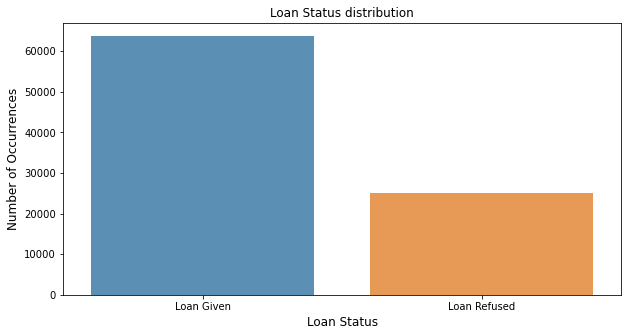

In [14]:
##PLotting the loan status 
status=train_set["loan_status"].value_counts() 
plt.figure(figsize=(10,5))
sns.barplot(status.index, status.values, alpha=0.8)
plt.title('Loan Status distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan Status', fontsize=12)
plt.show()

#### CURRENT LOAN AMOUNT

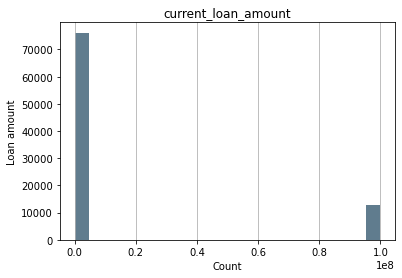

In [15]:
train_set['current_loan_amount'].describe()
train_set['current_loan_amount'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('current_loan_amount')
plt.xlabel('Count')
plt.ylabel('Loan amount')
plt.grid(axis='y', alpha=0.75)

16202.0


count    76172.000000
mean     13933.915756
std       8235.921922
min        491.000000
25%       7810.000000
50%      12038.000000
75%      19351.000000
max      35875.000000
Name: current_loan_amount_temp, dtype: float64

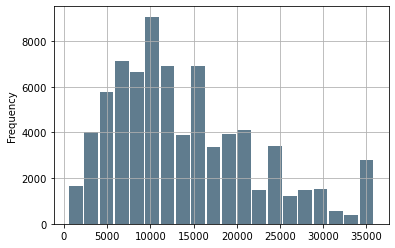

In [16]:
# The Bar plot shows an outlier 
#Finding IQR's for outlier removal

Q1 = train_set["current_loan_amount"].quantile(0.25)
Q3 = train_set["current_loan_amount"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


train_set["current_loan_amount"][((train_set["current_loan_amount"] < (Q1 - 1.5 * IQR)) |(train_set["current_loan_amount"] > (Q3 + 1.5 * IQR)))]


temp=np.array(train_set["current_loan_amount"].values.tolist())
train_set["current_loan_amount_temp"] = np.where(temp > 9999998, 'NaN', temp).tolist()


temp=train_set["current_loan_amount_temp"][train_set["current_loan_amount_temp"]!='NaN'].astype(str).astype(int)
temp.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
                   
temp.describe()


In [17]:
#Replacing the data with 50% percentile or mean
temp=np.array(train_set["current_loan_amount"].values.tolist())
train_set["current_loan_amount"] = np.where(temp > 9999998,12038,temp).tolist()

train_set=train_set.drop(['current_loan_amount_temp'],axis=1)

In [18]:
train_set["current_loan_amount"].describe()

count    88910.000000
mean     13662.290800
std       7652.028763
min        491.000000
25%       8283.000000
50%      12038.000000
75%      17705.750000
max      35875.000000
Name: current_loan_amount, dtype: float64

#### TERM

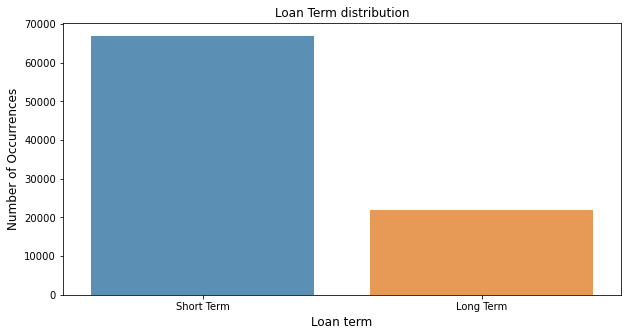

In [19]:
status=train_set["term"].value_counts() 

plt.figure(figsize=(10,5))
sns.barplot(status.index, status.values, alpha=0.8)
plt.title('Loan Term distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan term', fontsize=12)
plt.show()

#### CREDIT SCORE 

array([False,  True])

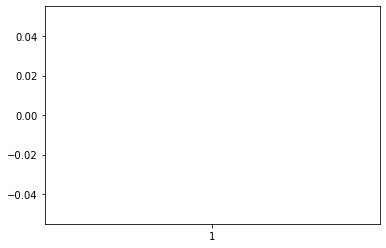

In [20]:
train_set["credit_score"].describe()
##Max is 7510. It should be between 0-800
plt.boxplot(train_set["credit_score"])
train_set["credit_score"].isnull().unique()

In [21]:
train_set["credit_score"].isnull().unique()

array([False,  True])

In [22]:
#Shows there are missing values in the data

#Now lets do treatment of the data at hand. Let us firstly divide the values greater than 800 by 10

train_set["credit_score"]=np.where(train_set["credit_score"]>800, train_set["credit_score"]/10, train_set["credit_score"])

In [23]:
#Now lets replace the missing values with median 
median_score=statistics.median(train_set["credit_score"])

In [24]:
train_set["credit_score_1"]=train_set["credit_score"]
train_set["credit_score_1"].fillna(median_score, inplace = True) 

<AxesSubplot:xlabel='credit_score_1', ylabel='Density'>

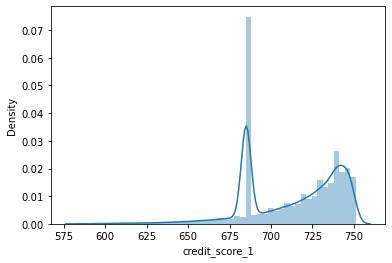

In [25]:
sns.distplot(train_set["credit_score_1"])
#As we can see this data is skewed so when we replace it with median it is giving us problems. 
#Replacing with 75th percentile and taking log we get a better distribution

<AxesSubplot:xlabel='credit_score', ylabel='Density'>

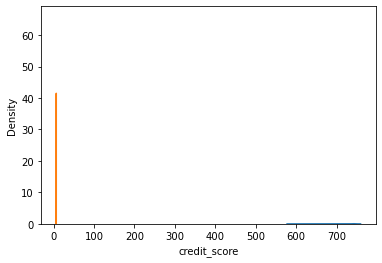

In [26]:
train_set["credit_score"].fillna(741, inplace = True) 

sns.distplot(train_set["credit_score"])
sns.distplot(np.log(train_set["credit_score"]))

#### HOME OWNERSHIP 

In [27]:
train_set['home_ownership'].unique()
#As we can see it has Home Mortgage and haveMortgage as 2 different classes. Lets fix that

train_set['home_ownership']=train_set['home_ownership'].str.replace('HaveMortgage', 'Home Mortgage', regex=True)

train_set['home_ownership'].unique()


array(['Rent', 'Home Mortgage', 'Own Home'], dtype=object)

#### ANNUAL INCOME

In [28]:
train_set['annual_income'].describe()

count    6.757200e+04
mean     7.234575e+04
std      5.836101e+04
min      4.033000e+03
25%      4.458600e+04
50%      6.149400e+04
75%      8.675025e+04
max      8.713547e+06
Name: annual_income, dtype: float64

In [29]:
##Lets look at the quantiles of this columns

train_set['annual_income'].quantile([.2,0.75,0.90,.95,0.99,.999])

0.200     40764.00
0.750     86750.25
0.900    119916.00
0.950    147645.00
0.990    239286.96
0.999    491575.77
Name: annual_income, dtype: float64

In [30]:
train_set['annual_income'].isna().sum()
#So we have about 21338 null values 

##We will impute the mising data with other columns towards the end

21338

#### PURPOSE

In [31]:

train_set['purpose'].value_counts()

Debt Consolidation      70447
Home Improvements        5206
other                    4917
Other                    2850
Business Loan            1328
Buy a Car                1196
Medical Bills             955
Buy House                 559
Take a Trip               454
major_purchase            344
small_business            248
moving                    124
wedding                    99
Educational Expenses       92
vacation                   82
renewable_energy            9
Name: purpose, dtype: int64

In [32]:
#So other and Other mean the same thing. Lets make it the same

train_set['purpose']=train_set['purpose'].str.replace('Other','other', regex=True)


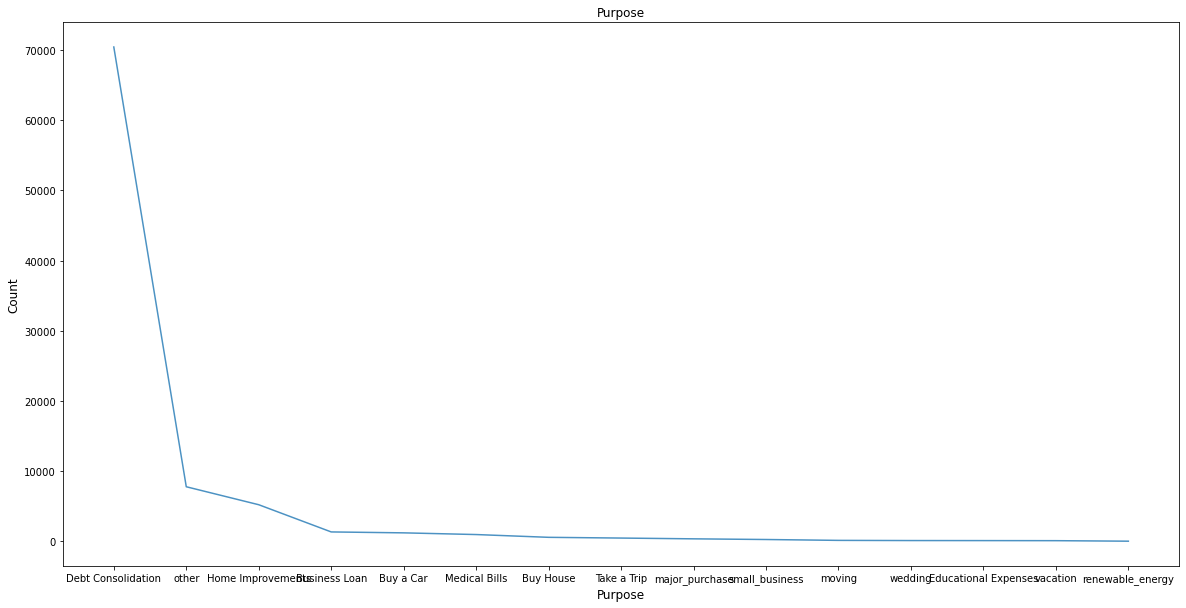

In [33]:
status=train_set["purpose"].value_counts() 

plt.figure(figsize=(20,10))
sns.lineplot(status.index, status.values, alpha=0.8)
plt.title('Purpose')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Purpose', fontsize=12)
plt.show()

#### MONTHLY DEBT

In [34]:
##So this is not numeric column. Lets explore
train_set['monthly_debt'] 

0         777.39
1         892.09
2        1244.02
3         990.94
4         503.71
          ...   
88905     567.62
88906    2508.63
88907     818.20
88908     360.17
88909     749.13
Name: monthly_debt, Length: 88910, dtype: float64

<AxesSubplot:xlabel='monthly_debt', ylabel='Density'>

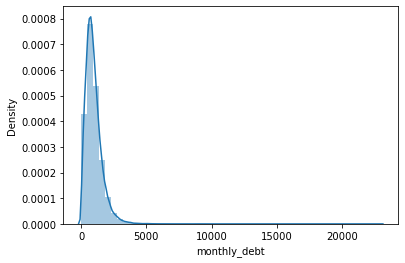

In [35]:
#As we can see there is a $ symbol present. Lets replace it 
train_set['monthly_debt']=train_set['monthly_debt'].apply(str).str.replace('$', '', regex=True)

train_set['monthly_debt']=pd.to_numeric(train_set['monthly_debt'] )

sns.distplot(train_set["monthly_debt"])


In [36]:
#We can see that there are outliers in this data because of the plot
#Lets explore

train_set['monthly_debt'].describe()

count    88910.000000
mean       963.102059
std        637.524064
min          0.000000
25%        532.220000
50%        843.925000
75%       1250.527500
max      22939.120000
Name: monthly_debt, dtype: float64

In [37]:
#The max value is too high here

train_set['monthly_debt'].quantile([.2,0.75,0.90,.95,0.99,.999])

0.200     463.75000
0.750    1250.52750
0.900    1743.08300
0.950    2115.51100
0.990    3087.11100
0.999    4926.37475
Name: monthly_debt, dtype: float64

In [38]:
#Problem is with 99th percentile. lets dig deeper

train_set['monthly_debt'].quantile([0.9995,.9999])

0.9995    5482.111455
0.9999    7774.610660
Name: monthly_debt, dtype: float64

In [39]:
#So problem again is wit 99th percentile

train_set['monthly_debt'].quantile([0.9997,.99999])

0.99970     5978.574911
0.99999    13262.762330
Name: monthly_debt, dtype: float64

In [40]:
train_set['monthly_debt'].quantile([0.999,1])

0.999     4926.37475
1.000    22939.12000
Name: monthly_debt, dtype: float64

<AxesSubplot:xlabel='monthly_debt', ylabel='Density'>

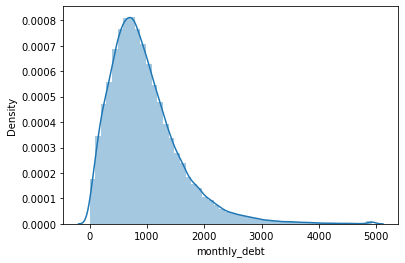

In [41]:
#Need to replace this


train_set.loc[train_set['monthly_debt'] > 4926, 'monthly_debt'] = 4926

sns.distplot(train_set["monthly_debt"])

In [42]:
#Now we get the right distribution

#### YEARS OF CREDIT HISTORY 

In [43]:
train_set['years_of_credit_history'].value_counts()

16.0    1234
15.0    1159
17.0    1091
16.5    1045
14.0    1031
        ... 
59.7       1
52.8       1
59.9       1
59.5       1
50.2       1
Name: years_of_credit_history, Length: 508, dtype: int64

<AxesSubplot:xlabel='years_of_credit_history', ylabel='Density'>

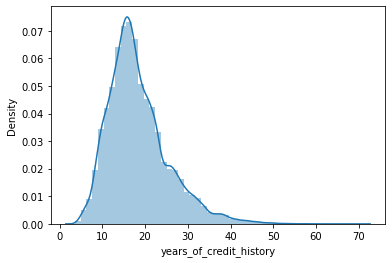

In [44]:
sns.distplot(train_set["years_of_credit_history"])
#Over all looks pretty clean! no need of doing anything


#### MONTH SINCE LAST DELINQUENT 

In [45]:
train_set['months_since_last_delinquent'].describe()

count    40404.000000
mean        35.080289
std         22.008583
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: months_since_last_delinquent, dtype: float64

In [46]:
#Lets check if there are any NA's
train_set['months_since_last_delinquent'].isna().sum()

48506

In [47]:
#We have nearly 48506 NA;s. We will try to handle them at last 

#### NUMBER OF OPEN CREDIT

In [48]:
train_set['number_of_open_accounts'].describe()

count    88910.000000
mean        11.110348
std          4.978461
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         76.000000
Name: number_of_open_accounts, dtype: float64

<AxesSubplot:xlabel='number_of_open_accounts', ylabel='Density'>

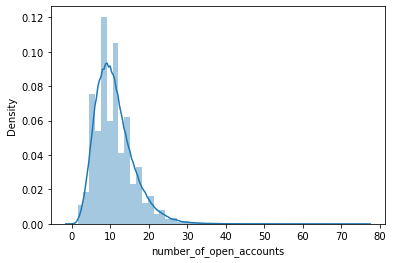

In [49]:
#The max number seems odd. Lets investigate


sns.distplot(train_set['number_of_open_accounts'])

In [50]:
#Yes there are outliers in this columns. Let dig deeper


train_set['number_of_open_accounts'].quantile([0.75,0.999,1])

0.750    14.0
0.999    36.0
1.000    76.0
Name: number_of_open_accounts, dtype: float64

In [51]:
#Ok so replacing anything greater than 99th percentile with 99th percentile values


train_set.loc[train_set['number_of_open_accounts'] > 36, 'number_of_open_accounts'] = 36

<AxesSubplot:xlabel='number_of_open_accounts', ylabel='Density'>

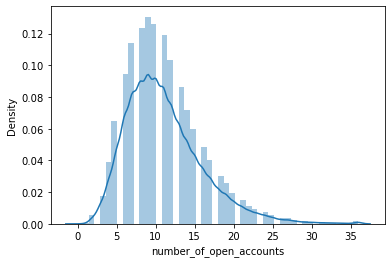

In [52]:
sns.distplot(train_set['number_of_open_accounts'])
#Looks good now

#### NUMBER OF CREDIT PROBLEMS

In [53]:
train_set['number_of_credit_problems'].describe()

count    88910.000000
mean         0.160477
std          0.473746
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: number_of_credit_problems, dtype: float64

<AxesSubplot:xlabel='number_of_credit_problems', ylabel='Density'>

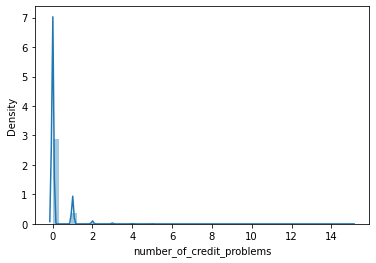

In [54]:
#Max looks a bit higher. Lets see

sns.distplot(train_set['number_of_credit_problems'])

In [55]:
#Okay lets look at value _counts

train_set['number_of_credit_problems'].value_counts()

0     77057
1     10271
2      1092
3       311
4       101
5        46
6        14
7         6
9         4
10        3
8         2
11        1
12        1
15        1
Name: number_of_credit_problems, dtype: int64

In [56]:
#Okay looks good

#### CURRENT CREDIT BALANCE

In [57]:
train_set['current_credit_balance'].describe()

count    8.891000e+04
mean     1.543593e+04
std      1.965873e+04
min      0.000000e+00
25%      5.949000e+03
50%      1.103900e+04
75%      1.930100e+04
max      1.730472e+06
Name: current_credit_balance, dtype: float64

<AxesSubplot:xlabel='current_credit_balance', ylabel='Density'>

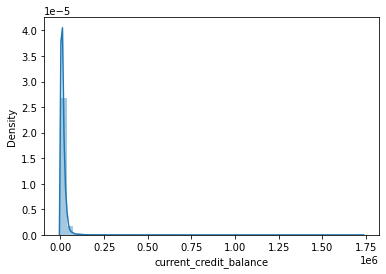

In [58]:
sns.distplot(train_set['current_credit_balance'])

In [59]:
##### It seems there are outliers in this data, Let's investigate

train_set['current_credit_balance'].quantile([0.75,0.95,0.999,1]) 


0.750      19301.000
0.950      39933.300
0.999     227670.033
1.000    1730472.000
Name: current_credit_balance, dtype: float64

In [60]:
#lets dig deeper
#So lets replace it with 95th percentile
train_set['current_credit_balance'].quantile([0.95,0.96,0.97,0.98,0.99,1])

0.95      39933.30
0.96      43501.20
0.97      48507.73
0.98      57938.12
0.99      81007.19
1.00    1730472.00
Name: current_credit_balance, dtype: float64

In [61]:
train_set.loc[train_set['current_credit_balance'] > 81007, 'Current Credit Balance'] = 81007

<AxesSubplot:xlabel='current_credit_balance', ylabel='Density'>

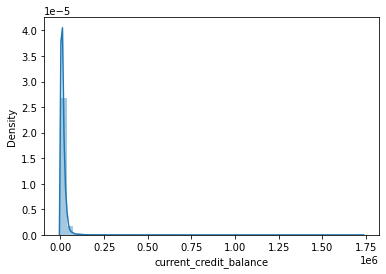

In [62]:
sns.distplot(train_set['current_credit_balance'])
#The plot doesnt look good. We need to transform it

<AxesSubplot:xlabel='current_credit_balance', ylabel='Density'>

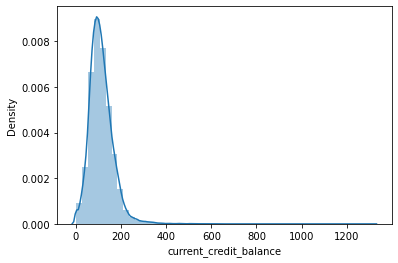

In [63]:
#The plot doesnt look good. We need to transform it by using square root 
sns.distplot(train_set['current_credit_balance']**(1/2))


#### MAXIMUM OPEN CREDIT 

In [64]:
train_set['maximum_open_credit'].describe()

count     88910
unique    46625
top           0
freq        610
Name: maximum_open_credit, dtype: object

In [65]:
train_set['maximum_open_credit'].value_counts()

0         610
17464      10
11044      10
14382      10
10782      10
         ... 
34875       1
68988       1
44124       1
54478       1
112068      1
Name: maximum_open_credit, Length: 46625, dtype: int64

In [66]:
#Lets replace #value with Nan
train_set['maximum_open_credit']=train_set['maximum_open_credit'].replace('#VALUE!', np.nan, regex=True)

In [67]:
train_set['maximum_open_credit']=pd.to_numeric(train_set['maximum_open_credit'])

In [68]:
train_set['maximum_open_credit'].isnull().sum()

2

In [69]:
#Now we have only 2 Nan;s in the data. Lets replace them with mean  
train_set['maximum_open_credit']=train_set['maximum_open_credit'].fillna(35965)

In [70]:
train_set['maximum_open_credit'].quantile([0.55,0.76,0.87,0.98,0.99,1])

0.55       24037.95
0.76       37259.84
0.87       50736.66
0.98      114682.56
0.99      171423.91
1.00    69988086.00
Name: maximum_open_credit, dtype: float64

In [71]:
#Lets replace the outliers


train_set.loc[train_set['maximum_open_credit'] > 171423, 'maximum_open_credit'] = 171423

<AxesSubplot:xlabel='maximum_open_credit', ylabel='Density'>

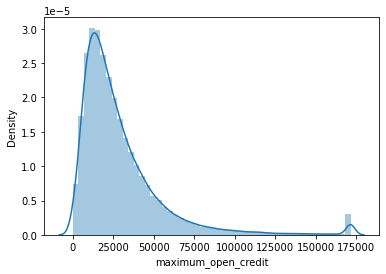

In [72]:
sns.distplot(train_set['maximum_open_credit'])

In [73]:
#Looks much better now

#### BANKRUPTCIES 

In [74]:
train_set['bankruptcies'].describe()

count    88718.000000
mean         0.112672
std          0.343300
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: bankruptcies, dtype: float64

In [75]:
train_set['bankruptcies'].value_counts()

0.0    79323
1.0     8936
2.0      353
3.0       80
4.0       19
5.0        5
7.0        1
6.0        1
Name: bankruptcies, dtype: int64

In [76]:
train_set['bankruptcies'].unique()

array([ 0.,  1., nan,  2.,  4.,  3.,  5.,  7.,  6.])

In [77]:
#So we have Nan's. Lets fill them with median

train_set['bankruptcies']=train_set['bankruptcies'].fillna(3)

#### TAX LIENS

In [78]:
train_set['tax_liens'].describe()

count    88902.000000
mean         0.028222
std          0.257533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: tax_liens, dtype: float64

In [79]:
train_set['tax_liens'].value_counts()

0.0     87274
1.0      1132
2.0       305
3.0        99
4.0        52
5.0        17
6.0         9
7.0         5
9.0         4
8.0         2
15.0        1
11.0        1
10.0        1
Name: tax_liens, dtype: int64

In [80]:
train_set['bankruptcies'].unique()

array([0., 1., 3., 2., 4., 5., 7., 6.])

### 2.DATA PREPARATION FOR  MODEL  BUILDING

#### CATEGORICAL VARIABLES  ("TERM", "YEARS IN CURRENT JOB", "HOME OWNERSHIP", "PURPOSE"

In [81]:
#We use a pandas embedded function to convert all categorical variable to ordinal 
cat_cols = ['term','years_in_current_job','home_ownership','purpose']

for c in cat_cols:
    train_set[c] = pd.factorize(train_set[c])[0]

#### REPLACING ALL MISSING VALUES and GETTING DUMMY VARIABLES

In [82]:
#Imputing missing data with simpleimputer
updated_train_set=pd.DataFrame(data=SimpleImputer().
                          fit_transform(train_set[train_set.columns[3:19]],)
                          , columns=train_set[train_set.columns[3:19]].
                          columns, index=train_set.index)

In [83]:
#Getting the dataset ready pd.get dummies function for dropping the dummy variables
train_set_LC = pd.get_dummies(updated_train_set, drop_first=True)

#### SETTING THE TARGET VARIABLE 

In [84]:
#Binarizing the Target variable. This is to create an array for 1 for loan "Given" and 0 loan "Refused"
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(train_set['loan_status'])
y=lb_results
y=y.ravel()

In [85]:
lb_results

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [86]:
lb_results.shape

(88910, 1)

#### SCALING THE INDEPENDENT VARIABLES 

In [87]:
#Scaling the independent variables
X_scaled = preprocessing.scale(train_set_LC)
print(X_scaled)
print('   ')
print(X_scaled.shape)

[[-0.1869176  -0.57302977  0.06886311 ... -0.79845518 -0.32295035
  -0.10959195]
 [ 1.48349848  1.74511004  0.26644983 ...  1.83825771 -0.32295035
  -0.10959195]
 [ 0.32079375 -0.57302977 -0.08920626 ... -0.53977375  2.39304617
  -0.10959195]
 ...
 [ 1.40247376 -0.57302977  0.78017528 ...  0.91232955 -0.32295035
  -0.10959195]
 [-1.1281112  -0.57302977 -0.16824094 ... -0.4039368  -0.32295035
  -0.10959195]
 [ 0.62515919 -0.57302977 -0.32631031 ... -0.30218149 -0.32295035
   3.7736061 ]]
   
(88910, 16)


#### SPLITTING THE DATA INTO TEST AND TRAIN 

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=22)

#### CHECKING IF THE  DATA IS BALANCED 

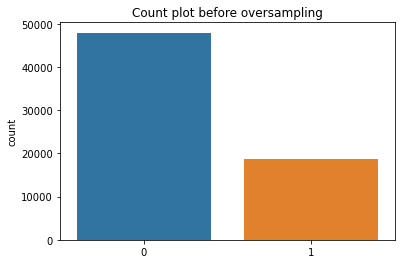

In [89]:
sns.countplot(y_train)
plt.title('Count plot before oversampling')
plt.show()

#### BALANCING THE DATA

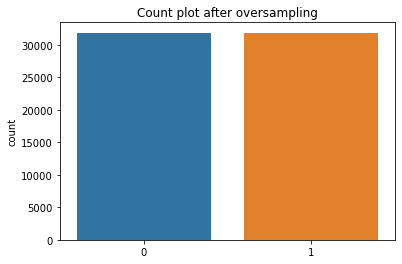

In [90]:
index_split = int(len(X_scaled)/2)
X_train, y_train = SMOTE().fit_resample(X_scaled[0:index_split, :], y[0:index_split])
X_test, y_test = X_scaled[index_split:], y[index_split:]
sns.countplot(y_train)
plt.title('Count plot after oversampling')
plt.show()

## BUILDING AND SELECTING THE BEST MODEL

In [91]:
def classify(est, x, y,X_test,y_test):
    #Passing the model and train test dataset to fit the model
    est.fit(x, y)
    
    #Predicting the probabilities of the Test data
    
    y2 = est.predict_proba(X_test)
    y1 = est.predict(X_test)

    print("Accuracy: ", metrics.accuracy_score(y_test, y1))
    print("Area under the ROC curve: ", metrics.roc_auc_score(y_test, y2[:, 1]))
    
    #Calculate different metrics
    
    print("F-metric: ", metrics.f1_score(y_test, y1))
    print(" ")
    print("Classification report:")
    print(metrics.classification_report(y_test, y1))
    print(" ")
    print("Evaluation by cross-validation:")
    print(cross_val_score(est, x, y))
    
    return est, y1, y2[:, 1]

In [92]:
#Model to  predict the ROC curve for various models and finding the best one
def run_models(X_train, y_train, X_test, y_test, model_type = 'balanced'):
    
    clfs = {'GradientBoosting': GradientBoostingClassifier(max_depth= 6, n_estimators=100, max_features = 0.3),
            'LogisticRegression' : LogisticRegression(),
            #'GaussianNB': GaussianNB(),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=10),
            'XGBClassifier': XGBClassifier()
            }
    cols = ['model','matthews_corrcoef', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]

        print('computing {} - {} '.format(clf_name, model_type))

        tmp = pd.Series({'model_type': model_type,
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'matthews_corrcoef': metrics.matthews_corrcoef(y_test, y_pred),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(10,8))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve - {}'.format(model_type))
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
    plt.plot([0,1],[0,1], color = 'black')
    
    return models_report, conf_matrix


#### ROC CURVE

computing GradientBoosting - Balanced 
computing LogisticRegression - Balanced 
computing RandomForestClassifier - Balanced 
[03:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
computing XGBClassifier - Balanced 


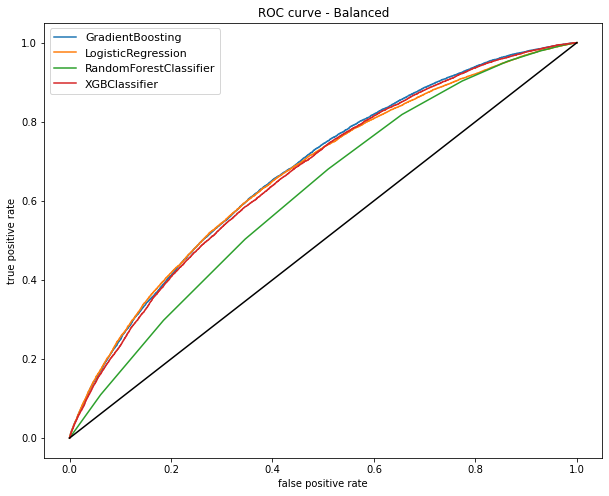

In [93]:
models_report_bal, conf_matrix_bal = run_models(X_train, y_train, X_test, y_test, model_type = 'Balanced')

#### MODELS REPORT

In [94]:
models_report_bal

,model,matthews_corrcoef,roc_auc_score,precision_score,recall_score,f1_score,model_type
0,GradientBoosting,0.179101,0.675308,0.321674,0.920749,0.476780,Balanced
1,LogisticRegression,0.224454,0.669797,0.391865,0.638471,0.485656,Balanced
2,RandomForestClassifier,0.160325,0.617730,0.329517,0.818319,0.469840,Balanced
3,XGBClassifier,0.192391,0.668292,0.336008,0.860374,0.483279,Balanced


#### CONFUSION MATRICES FOR THE  MODELS 

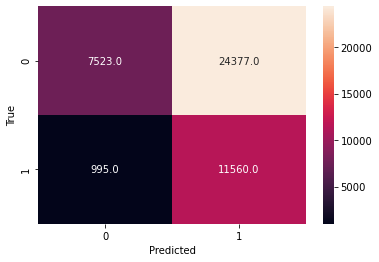

In [95]:
#GradientBoosting
 
sns.heatmap(conf_matrix_bal['GradientBoosting'], annot=True, fmt=".1f")
plt.show()

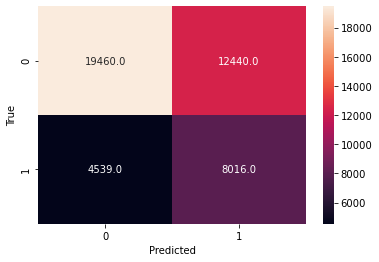

In [96]:
#LogisticRegression

sns.heatmap(conf_matrix_bal['LogisticRegression'], annot=True, fmt=".1f")
plt.show()

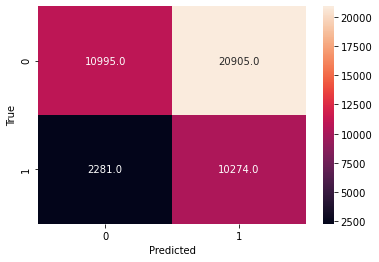

In [97]:
#RandomForestClassifier

sns.heatmap(conf_matrix_bal['RandomForestClassifier'], annot=True, fmt=".1f")
plt.show()


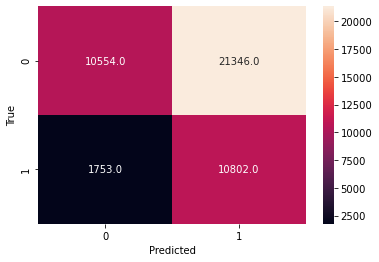

In [98]:
#XGBClassifier
sns.heatmap(conf_matrix_bal['XGBClassifier'], annot=True, fmt=".1f")
plt.show()

#### FEATURE IMPORTANCE  

[03:40:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:  0.48039590597233156
Area under the ROC curve:  0.6682921739955481
F-metric:  0.48327852716819897
 
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.33      0.48     31900
           1       0.34      0.86      0.48     12555

    accuracy                           0.48     44455
   macro avg       0.60      0.60      0.48     44455
weighted avg       0.71      0.48      0.48     44455

 
Evaluation by cross-validation:
[03:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logis

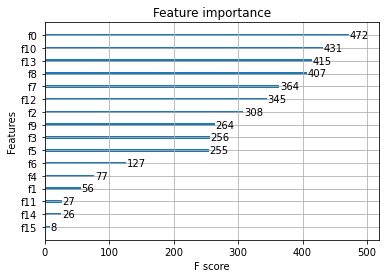

In [117]:
def feat_importance(estimator):
    feature_importance = {}
    for index, name in enumerate(train_set_LC.columns):
        feature_importance[name] = estimator.feature_importances_[index]

    feature_importance = {k: v for k, v in feature_importance.items()}
    sorted_x = sorted(feature_importance.items(), key=operator.itemgetter(1), reverse = True)
    
    return sorted_x

#Finding accuracy and feature importance using GBC classifier
xgb0, y_pred_b, y_pred2_b = classify(XGBClassifier(), X_train, y_train,X_test,y_test)
print(xgb0.feature_importances_)
plot_importance(xgb)
pyplot.show()
feat1 = feat_importance(xgb0)

In [120]:
# The Importance of each feature 
feat1


[('current_loan_amount', 0.2581892),
 ('credit_score', 0.15562187),
 ('years_in_current_job', 0.12210539),
 ('number_of_open_accounts', 0.10637905),
 ('term', 0.101031),
 ('purpose', 0.050884064),
 ('home_ownership', 0.050309535),
 ('annual_income', 0.031168107),
 ('maximum_open_credit', 0.021617303),
 ('months_since_last_delinquent', 0.019937288),
 ('current_credit_balance', 0.017983306),
 ('years_of_credit_history', 0.014525209),
 ('monthly_debt', 0.013684125),
 ('bankruptcies', 0.013526086),
 ('number_of_credit_problems', 0.012272572),
 ('tax_liens', 0.0107658785)]

In [122]:
from pandas import DataFrame
df = DataFrame(feat1,columns=['Feature','Percentage'])
print (df)

                         Feature  Percentage
0            current_loan_amount    0.258189
1                   credit_score    0.155622
2           years_in_current_job    0.122105
3        number_of_open_accounts    0.106379
4                           term    0.101031
5                        purpose    0.050884
6                 home_ownership    0.050310
7                  annual_income    0.031168
8            maximum_open_credit    0.021617
9   months_since_last_delinquent    0.019937
10        current_credit_balance    0.017983
11       years_of_credit_history    0.014525
12                  monthly_debt    0.013684
13                  bankruptcies    0.013526
14     number_of_credit_problems    0.012273
15                     tax_liens    0.010766


#### Visualizing feature importance


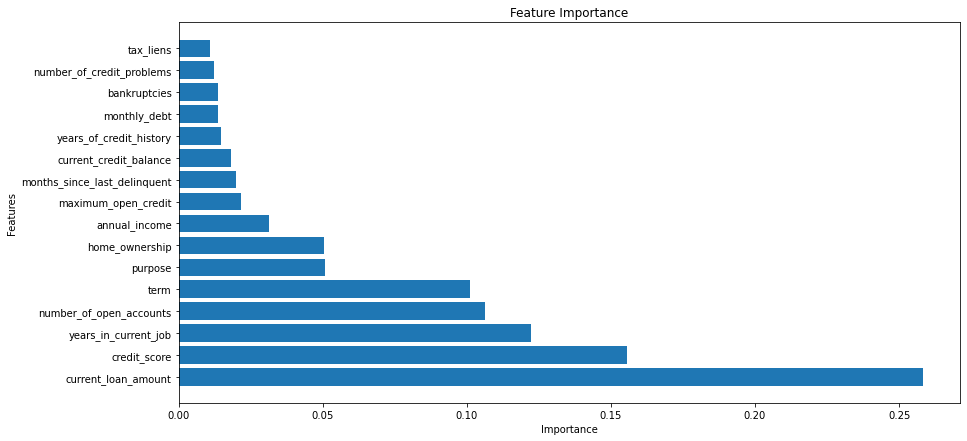

In [128]:
Df1=df.sort_values(by='Percentage',ascending=True,ignore_index=True)
plt.figure(figsize = (14,7))
plt.barh(df['Feature'],df['Percentage'],align='center')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

The first five features that the model placed more importance include:
1. Current Loan Amount
2. Credit Score
3. Years in Current Job
4. Number of Open Accounts 
5. Term 

# BEST MODEL SELECTION

We chose Gradient Boosting Classifier based on  roc auc_score for deployment. This model should help TBB  in speedily determing which customer should or should not be granted a loan in a very quick and reliable way.
